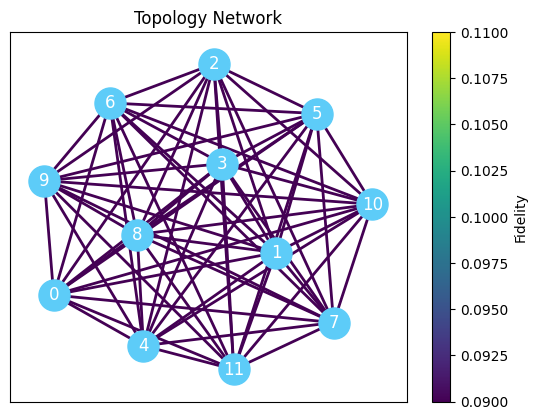

In [1]:
from components import *
import networkx as nx

rede = Network()
rede.set_fully_connected_topology(12)
#rede.set_lattice_topology(20, 30)
controlador = Controller()
controlador.set_network(rede)

rede.draw()

In [2]:
#paths = list(nx.shortest_simple_paths(rede.G, 0, 3))
#print(paths)

In [3]:
from itertools import islice
def k_shortest_paths(G, source, target, k, weight=None):
    return list(
        islice(nx.shortest_simple_paths(G, source, target, weight=weight), k)
    )
k_shortest_paths(rede.G, 0, 3, 5)

[[0, 3], [0, 1, 3], [0, 2, 3], [0, 4, 3], [0, 5, 3]]

In [4]:
def dfs_paths(G, source, target, length, path=None):
    if path is None:
        path = [source]

    if len(path) == length:
        if path[-1] == target:
            yield path
        return

    for neighbor in G.neighbors(source):
        if neighbor not in path:
            yield from dfs_paths(G, neighbor, target, length, path + [neighbor])

def find_paths_of_length(G, source, target, length):
    return list(dfs_paths(G, source, target, length + 1))  # length + 1 because length includes the source node

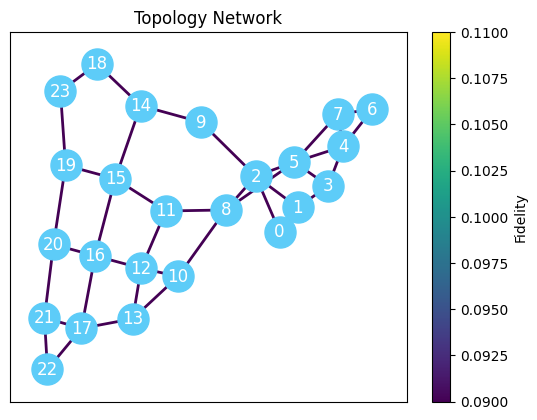

([<components.qubit.Qubit object at 0x000001D55C96E2D0>], {0})


In [5]:
usa = Network()
usa.set_USA_topology()
controlador.set_network(usa)
usa.draw()

q = Qubit()
qlist = [q]
print(usa.send_qubits([1, 3], qlist))
